In [ ]:
## 뉴스 기사 분류 : 다중 분류 문제
## ⚫ 1986년 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합
## ⚫ 이 데이터셋은 텍스트 분류를 위해 널리 사용되는 간단한 데이터셋
## ⚫ 46개의 토픽이 있으며 어떤 토픽은 다른 것에 비해 데이터가 많음
## ⚫ 각 토픽은 훈련 세트에 최소한 10개의 샘플을 가지고 있음
## ⚫ IMDB, MNIST와 마찬가지로 로이터 데이터셋은 케라스에서 제공

In [ ]:
## 4-1. 로이터 데이터셋 로드하기
from tensorflow.keras.datasets import reuters

(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data) ## 8982
len(test_data) ## 2246

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
## 4-12. 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key,value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
train_labels[10]

3

In [ ]:
#4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩 -> vectorize_sequences
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

 #4-13 데이터 인코딩
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

In [ ]:
#4-14 레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

from keras.utils.np_utils import to_categorical는 오류발생, 수업시간에 질문해보도록 하자.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
# 4-15. 모델 정의하기
model = keras. Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [ ]:
#4-16 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
#4-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#4-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.8723 - accuracy: 0.4618 - val_loss: 1.9261 - val_accuracy: 0.6160
Epoch 2/20
16/16 [==============================] - 1s 50ms/step - loss: 1.6013 - accuracy: 0.6759 - val_loss: 1.4028 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 1s 53ms/step - loss: 1.2159 - accuracy: 0.7368 - val_loss: 1.2104 - val_accuracy: 0.7310
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9975 - accuracy: 0.7818 - val_loss: 1.1169 - val_accuracy: 0.7460
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8299 - accuracy: 0.8181 - val_loss: 1.0466 - val_accuracy: 0.7580
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6982 - accuracy: 0.8475 - val_loss: 0.9676 - val_accuracy: 0.7870
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.5853 - accuracy: 0.8753 - val_loss: 0.9422 - val_accuracy: 0.7920
Epoch 8/20
16

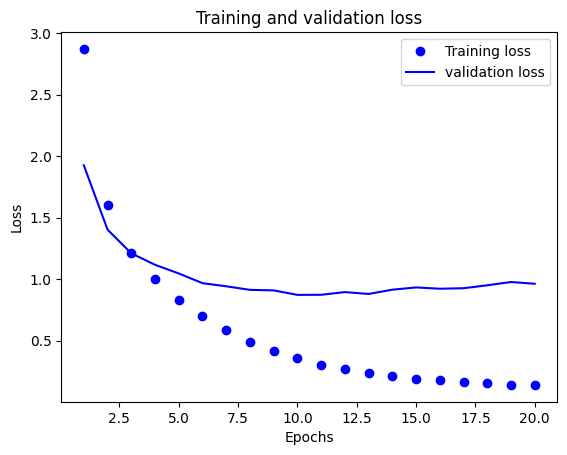

In [ ]:
# 4-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt # 샘플코드에선 없었음
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

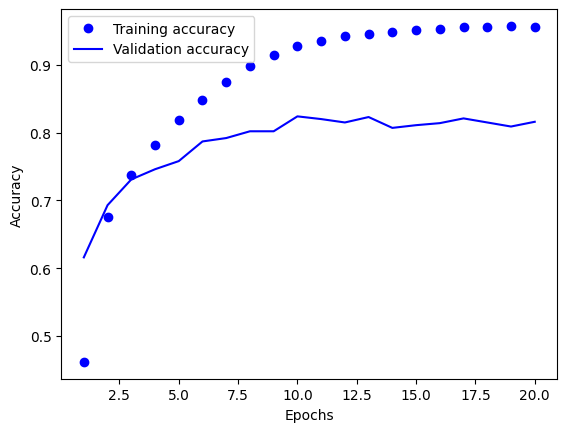

In [ ]:
# 4-20 훈련과 검증 정확도 그리기
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Epoch 1/20
16/16 [==============================] - 2s 68ms/step - loss: 2.7615 - accuracy: 0.4762 - val_loss: 1.8988 - val_accuracy: 0.5870
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.6096 - accuracy: 0.6475 - val_loss: 1.4223 - val_accuracy: 0.6720
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.2204 - accuracy: 0.7359 - val_loss: 1.2145 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 2s 138ms/step - loss: 0.9789 - accuracy: 0.7925 - val_loss: 1.0993 - val_accuracy: 0.7710
Epoch 5/20
16/16 [==============================] - 2s 131ms/step - loss: 0.8021 - accuracy: 0.8262 - val_loss: 1.0114 - val_accuracy: 0.7870
Epoch 6/20
16/16 [==============================] - 2s 112ms/step - loss: 0.6636 - accuracy: 0.8558 - val_loss: 0.9654 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 2s 137ms/step - loss: 0.5530 - accuracy: 0.8837 - val_loss: 0.9334 - val_accuracy: 0.7930
Epoch 8/2

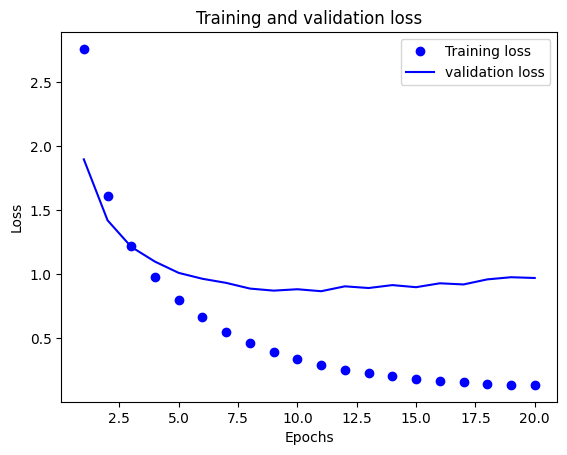

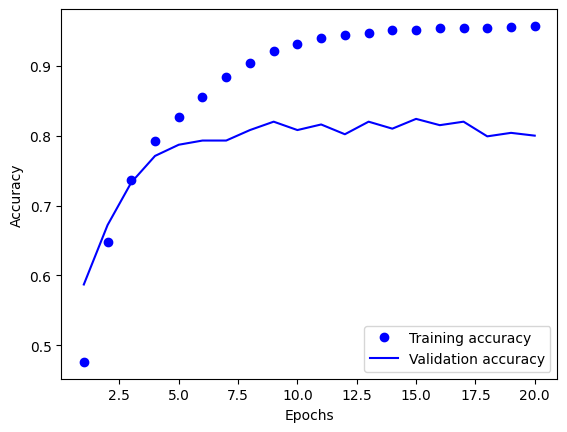

NameError: name 'results' is not defined

In [ ]:
# 4-21. 최종 소스코드 및 다시 훈련시키기
## 라이브러리 로드
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4-1. 로이터 데이터셋 로드하기
from tensorflow.keras.datasets import reuters

(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

## 4-12. 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key,value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩 -> vectorize_sequences
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

 #4-13 데이터 인코딩
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

#4-14 레이블 인코딩하기
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label]=1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

# 4-15. 모델 정의하기
model = keras. Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

#4-16 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

#4-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

#4-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

# 4-19 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt # 샘플코드에선 없었음
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 4-20 훈련과 검증 정확도 그리기
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
results ## 왜 정의되지 않았는가?